# Week 2:Day 5
## Advanced Models & Improvements

In [1]:
#Import Libraries
import pandas as pd # Data processing
import matplotlib.pyplot as plt # Data Visualization
import numpy as np # Array operations
import seaborn as sns # Data Visualization

In [2]:
#Load the dataset
claims_complete = pd.read_excel('Data/cleaned_claims_dataset_added_features.xlsx')

In [3]:
#Viewing the structure of the dataset

claims_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Claim_ID                        8000 non-null   object        
 1   Policy_ID                       8000 non-null   object        
 2   Accident_Date                   8000 non-null   datetime64[ns]
 3   FNOL_Date                       8000 non-null   datetime64[ns]
 4   Claim_Type                      8000 non-null   object        
 5   Claim_Complexity                8000 non-null   object        
 6   Fraud_Flag                      8000 non-null   bool          
 7   Litigation_Flag                 8000 non-null   bool          
 8   Estimated_Claim_Amount          8000 non-null   int64         
 9   Ultimate_Claim_Amount           8000 non-null   float64       
 10  Severity_Band                   8000 non-null   object        
 11  Sett

In [4]:
# Correcting the data types issues

#Changing the data type of Claim_Type, Claim_Complexity, Severity_Band, Status, Gender, Occupation, Region, Vehicle_Type and Credit_Score_Band from objects to Category
#Changing the data type of Accident_Date, FNOL_Date and Settlement_Date from objects to Datetime

claims_complete["Claim_Type"] = claims_complete["Claim_Type"].astype("category")  
claims_complete["Claim_Complexity"] = claims_complete["Claim_Complexity"].astype("category")
claims_complete["Severity_Band"] = claims_complete["Severity_Band"].astype("category")
claims_complete["Status"] = claims_complete["Status"].astype("category")
claims_complete["Gender"] = claims_complete["Gender"].astype("category")
claims_complete["Occupation"] = claims_complete["Occupation"].astype("category")
claims_complete["Region"] = claims_complete["Region"].astype("category")
claims_complete["Vehicle_Type"] = claims_complete["Vehicle_Type"].astype("category")
claims_complete["Credit_Score_Band"] = claims_complete["Credit_Score_Band"].astype("category")
claims_complete["Vehicle_Age_Band"] = claims_complete["Vehicle_Age_Band"].astype("category")
claims_complete["Driver_Age_Band"] = claims_complete["Driver_Age_Band"].astype("category")
claims_complete["Driving_Experience_Band"] = claims_complete["Driving_Experience_Band"].astype("category")
claims_complete["Accident_Season"] = claims_complete["Accident_Season"].astype("category")
claims_complete['Settlement_Date'] = pd.to_datetime(claims_complete['Settlement_Date'], errors='coerce')
claims_complete['Accident_Date'] = pd.to_datetime(claims_complete['Accident_Date'], errors='coerce')
claims_complete['FNOL_Date'] = pd.to_datetime(claims_complete['FNOL_Date'], errors='coerce')

#Confirming if the datatypes have been changed.
claims_complete.info()

#NB:the below results confirms the data types have been successfully changed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Claim_ID                        8000 non-null   object        
 1   Policy_ID                       8000 non-null   object        
 2   Accident_Date                   8000 non-null   datetime64[ns]
 3   FNOL_Date                       8000 non-null   datetime64[ns]
 4   Claim_Type                      8000 non-null   category      
 5   Claim_Complexity                8000 non-null   category      
 6   Fraud_Flag                      8000 non-null   bool          
 7   Litigation_Flag                 8000 non-null   bool          
 8   Estimated_Claim_Amount          8000 non-null   int64         
 9   Ultimate_Claim_Amount           8000 non-null   float64       
 10  Severity_Band                   8000 non-null   category      
 11  Sett

### Remove irrelevant features

In [5]:
#Removing irrelevant features

features_to_drop = [
    # Identifiers
    'Claim_ID', 'Policy_ID', 'Customer_ID',

    # Target & leakage
    'Ultimate_Claim_Amount',
    'Ultimate_Claim_Amount_Capped',
    'is_extreme_claim',
    'Severity_Weight',

    # Post-outcome info
    'Settlement_Date',
    'Status',
    'Settlement_Date_missing',

    # Raw dates
    'Accident_Date',
    'FNOL_Date',

    # Raw variables replaced by engineered features
    'Vehicle_Age',
    'Driving_Experience_Years',
    'Age_of_Driver',

    # Redundant severity fields
    'max_injury_severity',
    'ThirdParty_Severity_Score'
]

X = claims_complete.drop(columns=features_to_drop)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Claim_Type                      8000 non-null   category
 1   Claim_Complexity                8000 non-null   category
 2   Fraud_Flag                      8000 non-null   bool    
 3   Litigation_Flag                 8000 non-null   bool    
 4   Estimated_Claim_Amount          8000 non-null   int64   
 5   Severity_Band                   8000 non-null   category
 6   FNOL_Month_Num                  8000 non-null   int64   
 7   FNOL_DayOfWeek                  8000 non-null   int64   
 8   FNOL_IsWeekend                  8000 non-null   bool    
 9   Gender                          8000 non-null   category
 10  Occupation                      8000 non-null   category
 11  Region                          8000 non-null   category
 12  Annual_Mileage      

### Encoding of features

In [6]:
# Ordinal Encoding (Ordered categories)
# These feature categories have a natural severity / progression.

from sklearn.preprocessing import OrdinalEncoder

ordinal_features = [
    'Severity_Band',
    'Vehicle_Age_Band',
    'Driver_Age_Band',
    'Driving_Experience_Band',
    'Credit_Score_Band',
    'Claim_Complexity'
]

ordinal_categories = [
    ['Minor', 'Moderate', 'Major', 'Severe', 'Catastrophic'],   # Severity_Band
    ['0–3', '4–7', '8–12', '13–20', '20+'],                     # Vehicle_Age_Band
    ['18–25', '26–35', '36–45', '46–60', '60+'],                # Driver_Age_Band
    ['0–1', '2–5', '6–10', '11–20', '21+'],                     # Driving_Experience_Band
    ['Low', 'Medium', 'High', 'Very High'],                     # Credit_Score_Band
    ['Low', 'Medium', 'High']                                   # Claim_Complexity
]

ordinal_encoder = OrdinalEncoder(
    categories=ordinal_categories,
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X[ordinal_features] = ordinal_encoder.fit_transform(X[ordinal_features])

X[ordinal_features]

,Severity_Band,Vehicle_Age_Band,Driver_Age_Band,Driving_Experience_Band,Credit_Score_Band,Claim_Complexity
0,0.0,1.0,-1.0,4.0,-1.0,1.0
1,0.0,2.0,-1.0,4.0,-1.0,0.0
2,4.0,1.0,-1.0,0.0,-1.0,1.0
3,0.0,3.0,-1.0,1.0,-1.0,0.0
4,0.0,2.0,-1.0,2.0,-1.0,0.0
...,...,...,...,...,...,...
7995,2.0,2.0,-1.0,3.0,-1.0,0.0
7996,0.0,0.0,-1.0,4.0,-1.0,0.0
7997,0.0,1.0,-1.0,3.0,-1.0,0.0
7998,1.0,3.0,-1.0,3.0,-1.0,1.0


In [7]:
# One-Hot Encoding (Nominal, no natural order)
# These feature categories do not have ranking

nominal_features = [
    'Claim_Type',
    'Vehicle_Type',
    'Gender',
    'Occupation',
    'Region',
    'Accident_Season'
]

X = pd.get_dummies(
    X,
    columns=nominal_features,
    drop_first=True
)


In [8]:
# viewing the features in X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Claim_Complexity                8000 non-null   float64
 1   Fraud_Flag                      8000 non-null   bool   
 2   Litigation_Flag                 8000 non-null   bool   
 3   Estimated_Claim_Amount          8000 non-null   int64  
 4   Severity_Band                   8000 non-null   float64
 5   FNOL_Month_Num                  8000 non-null   int64  
 6   FNOL_DayOfWeek                  8000 non-null   int64  
 7   FNOL_IsWeekend                  8000 non-null   bool   
 8   Annual_Mileage                  8000 non-null   int64  
 9   Credit_Score_Band               8000 non-null   float64
 10  num_third_parties               8000 non-null   int64  
 11  has_minor                       8000 non-null   bool   
 12  has_serious                     80

In [9]:
#Viewing sample data in the columns to confirm all coloums are correctly encoded for training
X.head()

,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Severity_Band,FNOL_Month_Num,FNOL_DayOfWeek,FNOL_IsWeekend,Annual_Mileage,Credit_Score_Band,...,Region_Edinburgh,Region_Glasgow,Region_Leeds,Region_Liverpool,Region_London,Region_Manchester,Region_Newcastle,Accident_Season_Post-Rain,Accident_Season_Pre-Rain,Accident_Season_Rainy
0,1.0,False,True,5243,0.0,12,3,False,4891,-1.0,...,False,True,False,False,False,False,False,False,False,False
1,0.0,False,False,3934,0.0,12,0,False,18408,-1.0,...,False,False,False,False,False,False,True,False,False,False
2,1.0,False,False,153631,4.0,10,1,False,10793,-1.0,...,False,False,False,False,False,False,True,True,False,False
3,0.0,False,False,2812,0.0,6,4,False,9405,-1.0,...,False,False,False,False,False,False,True,False,False,True
4,0.0,False,False,5094,0.0,3,2,False,16729,-1.0,...,False,False,True,False,False,False,False,False,True,False


In [10]:
#Droping leakage columns
# Goal: Predict Ultimate Claim Amount early (at or shortly after FNOL)

# Severity_Band
    # Severity_Band is derived from claim outcomes,
    # Often assigned after investigation
    # Strongly correlated with Ultimate_Claim_Amount

# Litigation_Flag
    #That decision is made after severity becomes clear
    #This is post-outcome behavior, not a cause

#Fraud_Flag
# This is knowledge you don’t have early because investigation needs to be done
# We will use proxy variables (delay to FNOL, third-party count, etc.)

leakage_cols = [
    'Severity_Band',
    'Litigation_Flag',
    'Fraud_Flag'
]

X = X.drop(columns=leakage_cols)


In [11]:
# We will recompute the risk scores because the current risk scores have risk scores derived  from the target variable.
# This is to prevent information leakage and ensure the model reflects only information available at FNOL.
# We will therefore recompute using past claims only (based on Accident_Date) to compute the risk score.

# Determining the credibility threshold
claims_complete.groupby('Region', observed=True).size().describe()

# std = 47 is a very low variability
# Using k=50 will be ideal

count     10.000000
mean     800.000000
std       46.979901
min      737.000000
25%      771.750000
50%      799.000000
75%      816.000000
max      899.000000
dtype: float64

In [12]:
#Sort claims by time
claims_sorted = claims_complete.sort_values('Accident_Date').copy()

# We’ll use median (robust to outliers) with credibility weighting.
global_median = claims_sorted['Ultimate_Claim_Amount'].median()
k = 50  # credibility threshold
#“k = 100 means we only trust subgroup claim experience after sufficient historical evidence, 
#otherwise we blend with portfolio behavior to prevent noise-driven decisions.”

In [13]:
# Build Region Risk Score (leakage-free)
claims_sorted['Region_Risk_Score_LF'] = np.nan

for i, row in claims_sorted.iterrows():
    past_claims = claims_sorted.loc[
        claims_sorted['Accident_Date'] < row['Accident_Date']
    ]

    region_claims = past_claims[
        past_claims['Region'] == row['Region']
    ]

    if len(region_claims) == 0:
        claims_sorted.at[i, 'Region_Risk_Score_LF'] = global_median
    else:
        median_sev = region_claims['Ultimate_Claim_Amount'].median()
        n = len(region_claims)

        credible_score = (
            (n / (n + k)) * median_sev
            + (k / (n + k)) * global_median
        )

        claims_sorted.at[i, 'Region_Risk_Score_LF'] = credible_score

# Normalize risk scores
claims_sorted['Region_Risk_Score_Log'] = np.log1p(
    claims_sorted['Region_Risk_Score_LF']
)

#View sample data
claims_sorted['Region_Risk_Score_Log'].head()


4364    8.104552
5401    8.104552
6518    8.104552
5711    8.104552
5077    8.104552
Name: Region_Risk_Score_Log, dtype: float64

In [14]:
# Vehicle Risk Score (same logic)

claims_sorted['Vehicle_Risk_Score_LF'] = np.nan

for i, row in claims_sorted.iterrows():
    past_claims = claims_sorted.loc[
        claims_sorted['Accident_Date'] < row['Accident_Date']
    ]

    vehicle_claims = past_claims[
        past_claims['Vehicle_Type'] == row['Vehicle_Type']
    ]

    if len(vehicle_claims) == 0:
        claims_sorted.at[i, 'Vehicle_Risk_Score_LF'] = global_median
    else:
        median_sev = vehicle_claims['Ultimate_Claim_Amount'].median()
        n = len(vehicle_claims)

        claims_sorted.at[i, 'Vehicle_Risk_Score_LF'] = (
            (n / (n + k)) * median_sev
            + (k / (n + k)) * global_median
        )
# Normalize risk scores
claims_sorted['Vehicle_Risk_Score_Log'] = np.log1p(
    claims_sorted['Vehicle_Risk_Score_LF']
)

#View sample data
claims_sorted['Vehicle_Risk_Score_Log'].head()

4364    8.104552
5401    8.104552
6518    8.104552
5711    8.104552
5077    8.104552
Name: Vehicle_Risk_Score_Log, dtype: float64

In [15]:
# Driver Risk Score (using age band + experience band)

claims_sorted['Driver_Risk_Score_LF'] = np.nan

for i, row in claims_sorted.iterrows():
    past_claims = claims_sorted.loc[
        claims_sorted['Accident_Date'] < row['Accident_Date']
    ]

    driver_claims = past_claims[
        (past_claims['Driver_Age_Band'] == row['Driver_Age_Band']) &
        (past_claims['Driving_Experience_Band'] == row['Driving_Experience_Band'])
    ]

    if len(driver_claims) == 0:
        claims_sorted.at[i, 'Driver_Risk_Score_LF'] = global_median
    else:
        median_sev = driver_claims['Ultimate_Claim_Amount'].median()
        n = len(driver_claims)

        claims_sorted.at[i, 'Driver_Risk_Score_LF'] = (
            (n / (n + k)) * median_sev
            + (k / (n + k)) * global_median
        )

# Normalize risk scores
claims_sorted['Driver_Risk_Score_Log'] = np.log1p(
    claims_sorted['Driver_Risk_Score_LF']
)

#View sample data
claims_sorted['Driver_Risk_Score_Log'].head()


4364    8.104552
5401    8.104552
6518    8.104552
5711    8.104552
5077    8.104552
Name: Driver_Risk_Score_Log, dtype: float64

In [16]:
# we will drop the old leaked scores and add the new scores to the X DataFrame:

X = X.drop(columns=[
    'Region_Risk_Score',
    'Driver_Risk_Score',
    'Vehicle_Risk_Score'
])

X['Region_Risk_Score'] = claims_sorted['Region_Risk_Score_Log']
X['Driver_Risk_Score'] = claims_sorted['Driver_Risk_Score_Log']
X['Vehicle_Risk_Score'] = claims_sorted['Vehicle_Risk_Score_Log']


In [17]:
# Confirming the list of features for X

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Claim_Complexity                8000 non-null   float64
 1   Estimated_Claim_Amount          8000 non-null   int64  
 2   FNOL_Month_Num                  8000 non-null   int64  
 3   FNOL_DayOfWeek                  8000 non-null   int64  
 4   FNOL_IsWeekend                  8000 non-null   bool   
 5   Annual_Mileage                  8000 non-null   int64  
 6   Credit_Score_Band               8000 non-null   float64
 7   num_third_parties               8000 non-null   int64  
 8   has_minor                       8000 non-null   bool   
 9   has_serious                     8000 non-null   bool   
 10  has_fatality                    8000 non-null   bool   
 11  has_pedestrian                  8000 non-null   bool   
 12  has_passenger                   80

In [18]:
#These are post-investigation outcomes, not FNOL inputs. We will therefore remove them
#These outcomes are only known after investigation and medical assessment, not at FNOL.

X = X.drop(columns=[
    'has_minor', # Historical region / vehicle / driver risk will be ok
    'has_passenger', #TP_Count_Band will be ok
    'has_driver', #TP_Count_Band will be ok
    'has_serious', # Historical region / vehicle / driver risk will be ok
    'has_fatality', # Historical region / vehicle / driver risk will be ok
    'has_pedestrian' #TP_Count_Band will be ok
])

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Claim_Complexity                8000 non-null   float64
 1   Estimated_Claim_Amount          8000 non-null   int64  
 2   FNOL_Month_Num                  8000 non-null   int64  
 3   FNOL_DayOfWeek                  8000 non-null   int64  
 4   FNOL_IsWeekend                  8000 non-null   bool   
 5   Annual_Mileage                  8000 non-null   int64  
 6   Credit_Score_Band               8000 non-null   float64
 7   num_third_parties               8000 non-null   int64  
 8   Days_Accident_to_FNOL           8000 non-null   int64  
 9   Days_Accident_to_FNOL_Capped    8000 non-null   int64  
 10  Vehicle_Age_Band                8000 non-null   float64
 11  Driver_Age_Band                 8000 non-null   float64
 12  Driving_Experience_Band         80

In [19]:
# This score was derived from uses current-claim third-party information that is not reliably available at FNOL,
# and therefore introduces hidden leakage and circularity.

X = X.drop(columns=[
    'ThirdParty_Severity_Score_Norm'
])

X.info()

#From the below result, X is now ready for training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Claim_Complexity              8000 non-null   float64
 1   Estimated_Claim_Amount        8000 non-null   int64  
 2   FNOL_Month_Num                8000 non-null   int64  
 3   FNOL_DayOfWeek                8000 non-null   int64  
 4   FNOL_IsWeekend                8000 non-null   bool   
 5   Annual_Mileage                8000 non-null   int64  
 6   Credit_Score_Band             8000 non-null   float64
 7   num_third_parties             8000 non-null   int64  
 8   Days_Accident_to_FNOL         8000 non-null   int64  
 9   Days_Accident_to_FNOL_Capped  8000 non-null   int64  
 10  Vehicle_Age_Band              8000 non-null   float64
 11  Driver_Age_Band               8000 non-null   float64
 12  Driving_Experience_Band       8000 non-null   float64
 13  TP_

In [20]:
# Define target(y)

y = np.log1p(claims_complete['Ultimate_Claim_Amount'])

### Training the model

In [21]:
#Train–validation split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# 1. Initialize and Train Models (Gradient boosting Regressor)

from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbr_model.fit(X_train, y_train)



GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, random_state=42,
                          subsample=0.8)

In [23]:
#Install XGBoost

!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [24]:
# 2. Initialize and Train Models (XGboosting Regressor)

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(
    X_train,
    y_train
)

# Note

#Why these parameters?
#Parameter	Reason
#learning_rate=0.05	Better generalization
#max_depth=6	Captures interactions without overfitting
#subsample=0.8	Reduces variance
#colsample_bytree=0.8	Prevents feature dominance
#n_estimators=500	Works well with low learning rate

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [25]:
# 3. Initialize and Train Models (LightGBM Regressor)

from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
              n_jobs=-1, random_state=42, subsample=0.8)

In [26]:
# 4. Make Predictions (Using unique variable names)
y_pred_gbr = gbr_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)
y_pred_lgb = lgb_model.predict(X_val)

In [29]:
# 4. Evaluation Function

import pandas as pd
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"Results for {name}:")
    print(f"- MAE:  {mae:,.2f}")
    print(f"- RMSE: {rmse:,.2f}")
    print(f"- MAPE: {mape:.2f}%")
    print(f"- R²:   {r2:.4f}\n")

# Run Evaluation
evaluate_model("GradientBoostingRegressor", y_val, y_pred_gbr)
evaluate_model("XGboosting Regressor", y_val, y_pred_xgb)
evaluate_model("LightGBM Regressor", y_val, y_pred_lgb)

#From the results below
#  Gradient Boosting Regressor (Best)
# Lowest MAE → smallest average prediction error
# Lowest RMSE → best control of large claim errors
# Highest R² (92.5%) → explains most variability in claim cost
# All models perform strongly, but Gradient Boosting is consistently best across every metric. It delivers the most accurate and stable early claim cost predictions, outperforming advanced boosting alternatives.


Results for GradientBoostingRegressor:
- MAE:  0.20
- RMSE: 0.34
- MAPE: 2.42%
- R²:   0.9246

Results for XGboosting Regressor:
- MAE:  0.22
- RMSE: 0.37
- MAPE: 2.63%
- R²:   0.9116

Results for LightGBM Regressor:
- MAE:  0.22
- RMSE: 0.36
- MAPE: 2.63%
- R²:   0.9125



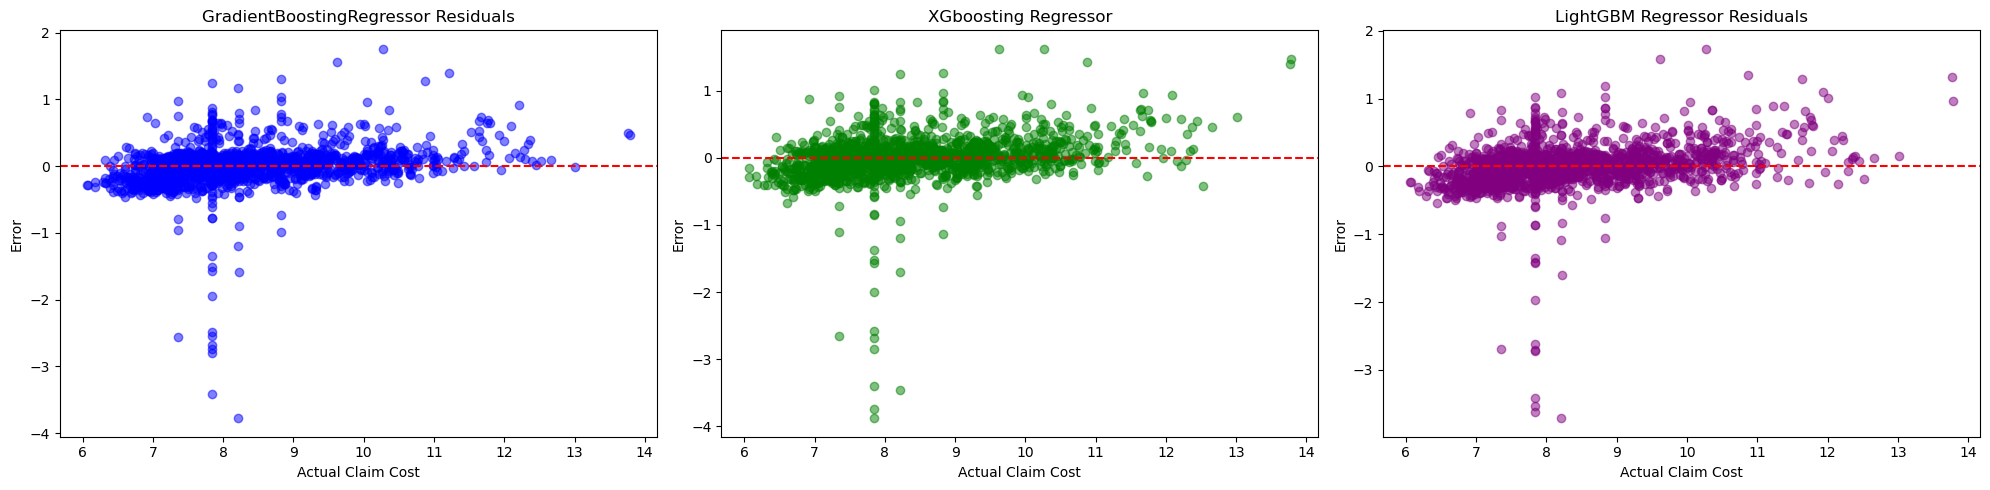

In [30]:
# 5. Residual Plot Analysis on tree models
# Changed to 1 row, 3 columns
fig, ax = plt.subplots(1, 3, figsize=(20, 5)) 

# RF Residuals - Index 0
ax[0].scatter(y_val, y_val - y_pred_gbr, alpha=0.5, color='blue')
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('GradientBoostingRegressor Residuals')
ax[0].set_xlabel('Actual Claim Cost')
ax[0].set_ylabel('Error')

# LR Residuals - Index 1
ax[1].scatter(y_val, y_val - y_pred_xgb, alpha=0.5, color='green')
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_title('XGboosting Regressor')
ax[1].set_xlabel('Actual Claim Cost')
ax[1].set_ylabel('Error')

ax[2].scatter(y_val, y_val - y_pred_lgb, alpha=0.5, color='purple') 
ax[2].axhline(0, color='red', linestyle='--')
ax[2].set_title('LightGBM Regressor Residuals')
ax[2].set_xlabel('Actual Claim Cost')
ax[2].set_ylabel('Error')

plt.tight_layout()
plt.savefig('Visualizations/Advanced Models & Improvements/Residual Plot Analysis_GradientBoosting_XGboosting_LightGBM.png', dpi=300, bbox_inches='tight')
plt.show()

# From the graph below:

# While all ensemble models perform well, Gradient Boosting demonstrates superior stability and unbiased error behavior across the full claim cost spectrum.
# Most points cluster close to zero, which is good.
# Spread is fairly consistent across the claim cost range.
# Not many extreme large errors.



### Hyperparameter tuning (GridSearch/Optuna)

In [23]:
# Why hyperparameter tuning

# Reduce MAE/RMSE (better reserve accuracy)
# Improve stability (less overfitting)
# Justify model choices for audit & governance
# Make early claim cost predictions more reliable


#### LightGBM - Hyperparameter tuning

In [24]:
# What to tune - LightGBM

# These parameters matter most 

# Parameter ------	Why it matters
# num_leaves -----	Controls tree complexity
# max_depth	------ Prevents overfitting
# learning_rate -----	Stability vs speed
# n_estimators ------	Model capacity
# min_child_samples -----	Noise control
# subsample	Variance ----- reduction
# colsample_bytree -------	Feature robustness


In [31]:
#GridSearchCV - LGBMRegressor

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

lgb = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'num_leaves': [31, 50, 80],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 400],
    'min_child_samples': [20, 50],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_lgbm = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_lgbm.fit(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

GridSearchCV(cv=5,
             estimator=LGBMRegressor(n_jobs=-1, objective='regression',
                                     random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [-1, 5, 10],
                         'min_child_samples': [20, 50],
                         'n_estimators': [200, 400], 'num_leaves': [31, 50, 80],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=1)

In [32]:
#Printing the best parameters -LGBM

best_lgbm = grid_lgbm.best_estimator_  #The LightGBM model trained with the best-performing hyperparameter combinations.

# best_lgb - is a fully trained, ready-to-use LightGBM regressor.

print("Best parameters:", grid_lgbm.best_params_) # Prints the exact hyperparameter combination that produced the best cross-validated performance.
print("Best CV MAE:", -grid_lgbm.best_score_) # Average Mean Absolute Error across all CV folds using the best hyperparameters


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 50, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
Best CV MAE: 0.20274891761414163


In [29]:
# Optuna installation

!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [34]:
#Optuna - LGBMRegressor

import optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

def objective(trial):
    params = {
        'objective': 'regression',
        'random_state': 42,
        'n_jobs': -1,
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 200, 800),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }

    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    return mae

study_optuna_lgbm = optuna.create_study(direction='minimize')
study_optuna_lgbm.optimize(objective, n_trials=50)

optuna_lgbm = LGBMRegressor(
    **study_optuna_lgbm.best_params,
    objective='regression',
    random_state=42,
    n_jobs=-1
)

optuna_lgbm.fit(X_train, y_train)

[I 2026-02-04 00:24:38,216] A new study created in memory with name: no-name-8e6ffa17-13eb-426f-8d24-071f1ca1378f


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:38,438] Trial 0 finished with value: 0.21435405657443216 and parameters: {'num_leaves': 65, 'max_depth': 6, 'learning_rate': 0.11229577435256946, 'n_estimators': 228, 'min_child_samples': 73, 'subsample': 0.986578771982594, 'colsample_bytree': 0.9849208710673689, 'reg_alpha': 0.05791578225473637, 'reg_lambda': 0.2947186340820551}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:38,975] Trial 1 finished with value: 0.22717543139919968 and parameters: {'num_leaves': 64, 'max_depth': 6, 'learning_rate': 0.11168579882403576, 'n_estimators': 790, 'min_child_samples': 73, 'subsample': 0.937358831696278, 'colsample_bytree': 0.8416756668342726, 'reg_alpha': 0.06708110467401818, 'reg_lambda': 0.8808151772898424}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:39,579] Trial 2 finished with value: 0.23542830933469985 and parameters: {'num_leaves': 83, 'max_depth': 9, 'learning_rate': 0.13893445562907525, 'n_estimators': 563, 'min_child_samples': 99, 'subsample': 0.8708077367292917, 'colsample_bytree': 0.9998559025908482, 'reg_alpha': 0.6251935470233233, 'reg_lambda': 0.0016578002589683338}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:40,675] Trial 3 finished with value: 0.24407307114108304 and parameters: {'num_leaves': 77, 'max_depth': 11, 'learning_rate': 0.164021419508793, 'n_estimators': 699, 'min_child_samples': 33, 'subsample': 0.761083794657968, 'colsample_bytree': 0.8348101659739222, 'reg_alpha': 0.3675220683731716, 'reg_lambda': 0.1738179911757347}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:41,175] Trial 4 finished with value: 0.23899984780778882 and parameters: {'num_leaves': 64, 'max_depth': 9, 'learning_rate': 0.1645864158260054, 'n_estimators': 364, 'min_child_samples': 44, 'subsample': 0.8531570098094392, 'colsample_bytree': 0.8712896107409775, 'reg_alpha': 0.5568781941316832, 'reg_lambda': 0.7822187766001972}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:41,528] Trial 5 finished with value: 0.22672515507102975 and parameters: {'num_leaves': 88, 'max_depth': 10, 'learning_rate': 0.13329250230634426, 'n_estimators': 295, 'min_child_samples': 83, 'subsample': 0.7071930437749206, 'colsample_bytree': 0.8620319369700612, 'reg_alpha': 0.7386349604613759, 'reg_lambda': 0.5154259169572453}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:42,178] Trial 6 finished with value: 0.21924113729110067 and parameters: {'num_leaves': 36, 'max_depth': 9, 'learning_rate': 0.05413166483078172, 'n_estimators': 597, 'min_child_samples': 100, 'subsample': 0.9531459004934391, 'colsample_bytree': 0.9701093998573767, 'reg_alpha': 0.1915115614371663, 'reg_lambda': 0.19959743271286268}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:42,851] Trial 7 finished with value: 0.23618405581237206 and parameters: {'num_leaves': 51, 'max_depth': 9, 'learning_rate': 0.16070983214238763, 'n_estimators': 531, 'min_child_samples': 59, 'subsample': 0.7135501579645748, 'colsample_bytree': 0.9427021957800247, 'reg_alpha': 0.7763339582319124, 'reg_lambda': 0.9259569850275456}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:43,544] Trial 8 finished with value: 0.23548328868207663 and parameters: {'num_leaves': 49, 'max_depth': 12, 'learning_rate': 0.15392167971449663, 'n_estimators': 710, 'min_child_samples': 32, 'subsample': 0.7206751912840775, 'colsample_bytree': 0.8395269264391679, 'reg_alpha': 0.8682382350062892, 'reg_lambda': 0.49179110296096085}. Best is trial 0 with value: 0.21435405657443216.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[I 2026-02-04 00:24:43,767] Trial 9 finished with value: 0.2138510497500333 and parameters: {'num_leaves': 91, 'max_depth': 3, 'learning_rate': 0.17369286967179698, 'n_estimators': 681, 'min_child_samples': 55, 'subsample': 0.9331753046536095, 'colsample_bytree': 0.7071862451547777, 'reg_alpha': 0.2946952740116344, 'reg_lambda': 0.5893299075516175}. Best is trial 9 with value: 0.2138510497500333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:43,939] Trial 10 finished with value: 0.21012186074811517 and parameters: {'num_leaves': 97, 'max_depth': 3, 'learning_rate': 0.19722136235505125, 'n_estimators': 403, 'min_child_samples': 53, 'subsample': 0.8970787490735114, 'colsample_bytree': 0.7161472661327276, 'reg_alpha': 0.349733127423444, 'reg_lambda': 0.6808207808586704}. Best is trial 10 with value: 0.21012186074811517.
[I 2026-02-04 00:24:44,093] Trial 11 finished with value: 0.21121615896986584 and parameters: {'num_leaves': 100, 'max_depth': 3, 'learning_rate': 0.19293338679383115, 'n_estimators': 397, 'min_child_samples': 52, 'subsample': 0.9115648861316312, 'colsample_bytree': 0.7012321155137571, 'reg_alpha': 0.33275312356869235, 'reg_lambda': 0.6564820548162372}. Best is trial 10 with value: 0.21012186074811517.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:44,263] Trial 12 finished with value: 0.21213965881533287 and parameters: {'num_leaves': 100, 'max_depth': 3, 'learning_rate': 0.1997571687091939, 'n_estimators': 418, 'min_child_samples': 20, 'subsample': 0.8909314529050616, 'colsample_bytree': 0.707803779244168, 'reg_alpha': 0.39449790837529725, 'reg_lambda': 0.7255142940778616}. Best is trial 10 with value: 0.21012186074811517.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:44,555] Trial 13 finished with value: 0.20948546360037937 and parameters: {'num_leaves': 99, 'max_depth': 5, 'learning_rate': 0.06247271337403846, 'n_estimators': 411, 'min_child_samples': 49, 'subsample': 0.8163493256878849, 'colsample_bytree': 0.7638577424911888, 'reg_alpha': 0.47650508978284967, 'reg_lambda': 0.6653191630118745}. Best is trial 13 with value: 0.20948546360037937.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:44,843] Trial 14 finished with value: 0.2086072111838946 and parameters: {'num_leaves': 76, 'max_depth': 5, 'learning_rate': 0.04999353109886055, 'n_estimators': 448, 'min_child_samples': 43, 'subsample': 0.8009714323226274, 'colsample_bytree': 0.7668053467785544, 'reg_alpha': 0.5060606493299482, 'reg_lambda': 0.4413934239663951}. Best is trial 14 with value: 0.2086072111838946.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:45,164] Trial 15 finished with value: 0.2077492365920949 and parameters: {'num_leaves': 76, 'max_depth': 5, 'learning_rate': 0.041369881313541704, 'n_estimators': 485, 'min_child_samples': 41, 'subsample': 0.8020289458529871, 'colsample_bytree': 0.7732171041774653, 'reg_alpha': 0.48175253488239045, 'reg_lambda': 0.3910541707098951}. Best is trial 15 with value: 0.2077492365920949.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:45,510] Trial 16 finished with value: 0.2032411248078329 and parameters: {'num_leaves': 74, 'max_depth': 5, 'learning_rate': 0.019382014304962836, 'n_estimators': 467, 'min_child_samples': 38, 'subsample': 0.8016163195344329, 'colsample_bytree': 0.7758494770108142, 'reg_alpha': 0.9751754186872102, 'reg_lambda': 0.37542339767809524}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:46,302] Trial 17 finished with value: 0.20733221557515294 and parameters: {'num_leaves': 76, 'max_depth': 7, 'learning_rate': 0.017345410798425116, 'n_estimators': 521, 'min_child_samples': 33, 'subsample': 0.8113664228129468, 'colsample_bytree': 0.7830719788259661, 'reg_alpha': 0.6777639213066721, 'reg_lambda': 0.34604832876590286}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:47,234] Trial 18 finished with value: 0.2073423610520662 and parameters: {'num_leaves': 51, 'max_depth': 7, 'learning_rate': 0.014007917833244996, 'n_estimators': 616, 'min_child_samples': 20, 'subsample': 0.757968420220806, 'colsample_bytree': 0.7983665063379293, 'reg_alpha': 0.9572446975351058, 'reg_lambda': 0.3255128123924767}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:47,849] Trial 19 finished with value: 0.20615420137644275 and parameters: {'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.010631283457618408, 'n_estimators': 478, 'min_child_samples': 31, 'subsample': 0.8285023252335875, 'colsample_bytree': 0.9128966831342982, 'reg_alpha': 0.969216163019502, 'reg_lambda': 0.06567803461257099}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396


[I 2026-02-04 00:24:48,159] Trial 20 finished with value: 0.2087350653779145 and parameters: {'num_leaves': 21, 'max_depth': 8, 'learning_rate': 0.07103612741937773, 'n_estimators': 315, 'min_child_samples': 28, 'subsample': 0.8417608555118474, 'colsample_bytree': 0.9023473450007922, 'reg_alpha': 0.9983444382459109, 'reg_lambda': 0.00814747544708419}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396


[I 2026-02-04 00:24:48,736] Trial 21 finished with value: 0.2037331402001259 and parameters: {'num_leaves': 26, 'max_depth': 7, 'learning_rate': 0.016091587606270837, 'n_estimators': 491, 'min_child_samples': 36, 'subsample': 0.7671959481227919, 'colsample_bytree': 0.9210397122437057, 'reg_alpha': 0.8508188508104839, 'reg_lambda': 0.14712290086335114}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:49,102] Trial 22 finished with value: 0.20638311198516074 and parameters: {'num_leaves': 22, 'max_depth': 6, 'learning_rate': 0.030511198664345665, 'n_estimators': 474, 'min_child_samples': 39, 'subsample': 0.764068609711052, 'colsample_bytree': 0.9075921804712604, 'reg_alpha': 0.8804305643058993, 'reg_lambda': 0.14760578990205675}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:49,393] Trial 23 finished with value: 0.21206894548357133 and parameters: {'num_leaves': 31, 'max_depth': 4, 'learning_rate': 0.08876059275495223, 'n_estimators': 569, 'min_child_samples': 25, 'subsample': 0.7808311693766014, 'colsample_bytree': 0.9284290496407636, 'reg_alpha': 0.869757617311865, 'reg_lambda': 0.10194561285730115}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:49,876] Trial 24 finished with value: 0.20692052158325575 and parameters: {'num_leaves': 37, 'max_depth': 8, 'learning_rate': 0.03012402858715349, 'n_estimators': 341, 'min_child_samples': 65, 'subsample': 0.8324455913086537, 'colsample_bytree': 0.8932823462871451, 'reg_alpha': 0.7917550515239948, 'reg_lambda': 0.2398548370139984}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:50,339] Trial 25 finished with value: 0.20346158480998347 and parameters: {'num_leaves': 28, 'max_depth': 7, 'learning_rate': 0.012867849102260895, 'n_estimators': 471, 'min_child_samples': 37, 'subsample': 0.7414794939966021, 'colsample_bytree': 0.9478075632555895, 'reg_alpha': 0.938377873214012, 'reg_lambda': 0.08620808792756635}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:50,599] Trial 26 finished with value: 0.20387016131947916 and parameters: {'num_leaves': 44, 'max_depth': 6, 'learning_rate': 0.03266371710656532, 'n_estimators': 249, 'min_child_samples': 38, 'subsample': 0.7372352680221494, 'colsample_bytree': 0.9451140448636418, 'reg_alpha': 0.8527898924667261, 'reg_lambda': 0.25078103512894573}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:50,894] Trial 27 finished with value: 0.21147722727155407 and parameters: {'num_leaves': 26, 'max_depth': 4, 'learning_rate': 0.08186638918572592, 'n_estimators': 637, 'min_child_samples': 47, 'subsample': 0.7394995314744207, 'colsample_bytree': 0.8060454610001999, 'reg_alpha': 0.6917368857895689, 'reg_lambda': 0.10843466639128974}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:51,481] Trial 28 finished with value: 0.20578632240564587 and parameters: {'num_leaves': 58, 'max_depth': 8, 'learning_rate': 0.02275310780848898, 'n_estimators': 528, 'min_child_samples': 64, 'subsample': 0.7893314781175079, 'colsample_bytree': 0.9643370495183808, 'reg_alpha': 0.9226494525728578, 'reg_lambda': 0.2614443359333575}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:51,869] Trial 29 finished with value: 0.20891015606469718 and parameters: {'num_leaves': 70, 'max_depth': 6, 'learning_rate': 0.04047605153747053, 'n_estimators': 433, 'min_child_samples': 37, 'subsample': 0.7344708121635477, 'colsample_bytree': 0.7295463320382233, 'reg_alpha': 0.8220470012710863, 'reg_lambda': 0.39416920162067365}. Best is trial 16 with value: 0.2032411248078329.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:51,999] Trial 30 finished with value: 0.20283092689043675 and parameters: {'num_leaves': 39, 'max_depth': 4, 'learning_rate': 0.09783829754747546, 'n_estimators': 210, 'min_child_samples': 47, 'subsample': 0.993008267874922, 'colsample_bytree': 0.8815163281101325, 'reg_alpha': 0.9062349915096619, 'reg_lambda': 0.07480061822338764}. Best is trial 30 with value: 0.20283092689043675.
[I 2026-02-04 00:24:52,141] Trial 31 finished with value: 0.2039978737546365 and parameters: {'num_leaves': 39, 'max_depth': 4, 'learning_rate': 0.09535986195817894, 'n_estimators': 251, 'min_child_samples': 47, 'subsample': 0.9972783907722648, 'colsample_bytree': 0.8770765614496113, 'reg_alpha': 0.9220622326408964, 'reg_lambda': 0.09335799675072394}. Best is trial 30 with value: 0.20283092689043675.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:52,401] Trial 32 finished with value: 0.21608377960935335 and parameters: {'num_leaves': 28, 'max_depth': 5, 'learning_rate': 0.1284983965527106, 'n_estimators': 351, 'min_child_samples': 36, 'subsample': 0.7775263378554905, 'colsample_bytree': 0.9281379447332995, 'reg_alpha': 0.9981367689907329, 'reg_lambda': 0.18538437259750062}. Best is trial 30 with value: 0.20283092689043675.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:52,713] Trial 33 finished with value: 0.22224240363938472 and parameters: {'num_leaves': 43, 'max_depth': 7, 'learning_rate': 0.11933049260841493, 'n_estimators': 277, 'min_child_samples': 26, 'subsample': 0.9693553847665607, 'colsample_bytree': 0.8827736038216838, 'reg_alpha': 0.7394468457974002, 'reg_lambda': 0.049173866909138136}. Best is trial 30 with value: 0.20283092689043675.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:52,971] Trial 34 finished with value: 0.20627095520603475 and parameters: {'num_leaves': 59, 'max_depth': 4, 'learning_rate': 0.046510955115833294, 'n_estimators': 565, 'min_child_samples': 73, 'subsample': 0.7537451411790033, 'colsample_bytree': 0.8227287732959426, 'reg_alpha': 0.0107326763783675, 'reg_lambda': 0.006961063343846219}. Best is trial 30 with value: 0.20283092689043675.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:53,482] Trial 35 finished with value: 0.22499381254698023 and parameters: {'num_leaves': 20, 'max_depth': 6, 'learning_rate': 0.10770798133205572, 'n_estimators': 746, 'min_child_samples': 42, 'subsample': 0.8601746976490489, 'colsample_bytree': 0.9899006732437965, 'reg_alpha': 0.9353222995514274, 'reg_lambda': 0.14682027565645397}. Best is trial 30 with value: 0.20283092689043675.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:53,877] Trial 36 finished with value: 0.21583060594141582 and parameters: {'num_leaves': 32, 'max_depth': 10, 'learning_rate': 0.0679130813534291, 'n_estimators': 375, 'min_child_samples': 91, 'subsample': 0.7004824339731137, 'colsample_bytree': 0.8628448619881368, 'reg_alpha': 0.585780077329492, 'reg_lambda': 0.2999910266406536}. Best is trial 30 with value: 0.20283092689043675.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:54,046] Trial 37 finished with value: 0.2024826077453434 and parameters: {'num_leaves': 69, 'max_depth': 5, 'learning_rate': 0.06060466997355245, 'n_estimators': 214, 'min_child_samples': 59, 'subsample': 0.7765331131238707, 'colsample_bytree': 0.9725041566189441, 'reg_alpha': 0.6682167201999425, 'reg_lambda': 0.19484302071182333}. Best is trial 37 with value: 0.2024826077453434.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:54,206] Trial 38 finished with value: 0.2041158886139759 and parameters: {'num_leaves': 70, 'max_depth': 5, 'learning_rate': 0.07742513070164958, 'n_estimators': 203, 'min_child_samples': 68, 'subsample': 0.878408585501709, 'colsample_bytree': 0.9529037686856315, 'reg_alpha': 0.6620846573886059, 'reg_lambda': 0.20904135563592954}. Best is trial 37 with value: 0.2024826077453434.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:54,355] Trial 39 finished with value: 0.20079691165281513 and parameters: {'num_leaves': 67, 'max_depth': 4, 'learning_rate': 0.058395849627358984, 'n_estimators': 222, 'min_child_samples': 56, 'subsample': 0.7874121313684053, 'colsample_bytree': 0.9993095151153719, 'reg_alpha': 0.6339393133909197, 'reg_lambda': 0.3682458967485766}. Best is trial 39 with value: 0.20079691165281513.
[I 2026-02-04 00:24:54,490] Trial 40 finished with value: 0.20355444677850096 and parameters: {'num_leaves': 82, 'max_depth': 4, 'learning_rate': 0.09712909548513349, 'n_estimators': 218, 'min_child_samples': 58, 'subsample': 0.7949570102563449, 'colsample_bytree': 0.9969656087319414, 'reg_alpha': 0.6026837862103134, 'reg_lambda': 0.4932770699174307}. Best is trial 39 with value: 0.20079691165281513.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:54,639] Trial 41 finished with value: 0.20037269578002523 and parameters: {'num_leaves': 66, 'max_depth': 4, 'learning_rate': 0.05610534561460895, 'n_estimators': 240, 'min_child_samples': 61, 'subsample': 0.7759937171538043, 'colsample_bytree': 0.9754989616050815, 'reg_alpha': 0.756503641978797, 'reg_lambda': 0.5656402203547254}. Best is trial 41 with value: 0.20037269578002523.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:54,789] Trial 42 finished with value: 0.20276005068908062 and parameters: {'num_leaves': 68, 'max_depth': 4, 'learning_rate': 0.05418875598970834, 'n_estimators': 244, 'min_child_samples': 79, 'subsample': 0.8216535376662059, 'colsample_bytree': 0.9763501897640559, 'reg_alpha': 0.7537239037585439, 'reg_lambda': 0.5907124540862837}. Best is trial 41 with value: 0.20037269578002523.
[I 2026-02-04 00:24:54,912] Trial 43 finished with value: 0.20110125053256372 and parameters: {'num_leaves': 63, 'max_depth': 3, 'learning_rate': 0.05940168988397958, 'n_estimators': 240, 'min_child_samples': 81, 'subsample': 0.8202305298583669, 'colsample_bytree': 0.9771339593427997, 'reg_alpha': 0.7259471588156315, 'reg_lambda': 0.5626384796097751}. Best is trial 41 with value: 0.20037269578002523.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:55,040] Trial 44 finished with value: 0.20141928688463076 and parameters: {'num_leaves': 64, 'max_depth': 3, 'learning_rate': 0.05995202109665585, 'n_estimators': 251, 'min_child_samples': 82, 'subsample': 0.8198029666834827, 'colsample_bytree': 0.9759711948715809, 'reg_alpha': 0.7292384158495905, 'reg_lambda': 0.5825265826935958}. Best is trial 41 with value: 0.20037269578002523.
[I 2026-02-04 00:24:55,166] Trial 45 finished with value: 0.2012791255333114 and parameters: {'num_leaves': 62, 'max_depth': 3, 'learning_rate': 0.06338257425008519, 'n_estimators': 287, 'min_child_samples': 88, 'subsample': 0.8412442552249314, 'colsample_bytree': 0.9808883351696992, 'reg_alpha': 0.7012807919965139, 'reg_lambda': 0.5727798112259042}. Best is trial 41 with value: 0.20037269578002523.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:55,297] Trial 46 finished with value: 0.20168373107587578 and parameters: {'num_leaves': 62, 'max_depth': 3, 'learning_rate': 0.077424572903077, 'n_estimators': 288, 'min_child_samples': 90, 'subsample': 0.8536719638744371, 'colsample_bytree': 0.9817695615406343, 'reg_alpha': 0.5386532001607283, 'reg_lambda': 0.5477770224267444}. Best is trial 41 with value: 0.20037269578002523.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2026-02-04 00:24:55,434] Trial 47 finished with value: 0.20108165927155183 and parameters: {'num_leaves': 56, 'max_depth': 3, 'learning_rate': 0.053775867638032805, 'n_estimators': 260, 'min_child_samples': 83, 'subsample': 0.8409092321402059, 'colsample_bytree': 0.9615959652584747, 'reg_alpha': 0.7104202182777173, 'reg_lambda': 0.7692010937874085}. Best is trial 41 with value: 0.20037269578002523.
[I 2026-02-04 00:24:55,572] Trial 48 finished with value: 0.20186841306608339 and parameters: {'num_leaves': 55, 'max_depth': 3, 'learning_rate': 0.0687970097164975, 'n_estimators': 317, 'min_child_samples': 94, 'subsample': 0.8398535835463845, 'colsample_bytree': 0.9595402627546268, 'reg_alpha': 0.6366367742513583, 'reg_lambda': 0.8522652340983167}. Best is trial 41 with value: 0.20037269578002523.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2026-02-04 00:24:55,698] Trial 49 finished with value: 0.2014603988110993 and parameters: {'num_leaves': 56, 'max_depth': 3, 'learning_rate': 0.03792050829812513, 'n_estimators': 274, 'min_child_samples': 76, 'subsample': 0.8781338001845705, 'colsample_bytree': 0.9999435002262593, 'reg_alpha': 0.7968189813742352, 'reg_lambda': 0.7604926464606259}. Best is trial 41 with value: 0.20037269578002523.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 42
[LightGBM] [Info] Start training from score 8.374396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor(colsample_bytree=0.9754989616050815,
              learning_rate=0.05610534561460895, max_depth=4,
              min_child_samples=61, n_estimators=240, n_jobs=-1, num_leaves=66,
              objective='regression', random_state=42,
              reg_alpha=0.756503641978797, reg_lambda=0.5656402203547254,
              subsample=0.7759937171538043)

In [35]:
#Printing the best parameters - optuna - LGBM

print("Best Parameters:")
for k, v in study_optuna_lgbm.best_params.items():
    print(f"  {k}: {v}")

print(f"\nBest CV MAE (log-scale): {study_optuna_lgbm.best_value:.4f}")


Best Parameters:
  num_leaves: 66
  max_depth: 4
  learning_rate: 0.05610534561460895
  n_estimators: 240
  min_child_samples: 61
  subsample: 0.7759937171538043
  colsample_bytree: 0.9754989616050815
  reg_alpha: 0.756503641978797
  reg_lambda: 0.5656402203547254

Best CV MAE (log-scale): 0.2004


#### Gradient Boosting Regressor (sklearn) - Hyperparameter tuning

In [ ]:
# Gradient Boosting Regressor (sklearn)

# Why tune?

# Sequential learning improves accuracy
# More stable than single trees
# Slower than LightGBM

In [ ]:
# What to tune - Gradient Boosting Regressor (sklearn)

# These parameters matter most 

# learning_rate	---Stability
# n_estimators	---Capacity
# max_depth	--------Tree complexity
# subsample	--------Overfitting control


In [36]:
#GridSearchCV - Gradient Boosting Regressor (sklearn)

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_gbr = GridSearchCV(
    gbr,
    param_grid,
    scoring='neg_mean_absolute_error',
    cv=5
)

grid_gbr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [200, 400], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [37]:
#Printing best parameters - GradientBoosting
print("Best parameters:", grid_gbr.best_estimator_) 
print("Best CV MAE:", -grid_gbr.best_score_)

Best parameters: GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42,
                          subsample=0.8)
Best CV MAE: 0.19776153585264628


In [38]:
#Optuna - Gradient Boosting Regressor (sklearn)
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

def gbr_objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 20, 100),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "max_features": trial.suggest_float("max_features", 0.4, 0.9),
        "random_state": 42
    }

    model = GradientBoostingRegressor(**params)

    score = cross_val_score(
        model,
        X_train,
        y_train,
        scoring="neg_mean_absolute_error",
        cv=5,
        n_jobs=-1
    ).mean()

    return -score  # Optuna minimizes

#Run Optuna study
study_optuna_gbr = optuna.create_study(direction="minimize")
study_optuna_gbr.optimize(gbr_objective, n_trials=50)

#Train the best Gradient Boosting model
optuna_gbr = GradientBoostingRegressor(
    **study_optuna_gbr.best_params,
    random_state=42
)

optuna_gbr.fit(X_train, y_train)


[I 2026-02-04 00:35:32,665] A new study created in memory with name: no-name-0e11856a-b853-4a6e-a003-fbdbaea47956
[I 2026-02-04 00:36:49,347] Trial 0 finished with value: 0.2064884755514115 and parameters: {'n_estimators': 918, 'learning_rate': 0.0194061758651509, 'max_depth': 6, 'min_samples_leaf': 98, 'subsample': 0.80189307195523, 'max_features': 0.8901689663668535}. Best is trial 0 with value: 0.2064884755514115.
[I 2026-02-04 00:37:01,207] Trial 1 finished with value: 0.21994959588804597 and parameters: {'n_estimators': 696, 'learning_rate': 0.07732856910479399, 'max_depth': 5, 'min_samples_leaf': 58, 'subsample': 0.7478991200649749, 'max_features': 0.5091003238671461}. Best is trial 0 with value: 0.2064884755514115.
[I 2026-02-04 00:37:23,117] Trial 2 finished with value: 0.22028318952404788 and parameters: {'n_estimators': 789, 'learning_rate': 0.0716608580235579, 'max_depth': 6, 'min_samples_leaf': 52, 'subsample': 0.8354854493856005, 'max_features': 0.7598199400957982}. Best i

GradientBoostingRegressor(learning_rate=0.022264433688618933, max_depth=2,
                          max_features=0.8279708674145011, min_samples_leaf=24,
                          n_estimators=700, random_state=42,
                          subsample=0.8520198048360761)

In [39]:
print("===== Gradient Boosting (Optuna) =====")
print("Best parameters:")
for k, v in study_optuna_gbr.best_params.items():
    print(f"  {k}: {v}")

print(f"\nBest CV MAE (log-scale): {study_optuna_gbr.best_value:.4f}")


===== Gradient Boosting (Optuna) =====
Best parameters:
  n_estimators: 700
  learning_rate: 0.022264433688618933
  max_depth: 2
  min_samples_leaf: 24
  subsample: 0.8520198048360761
  max_features: 0.8279708674145011

Best CV MAE (log-scale): 0.1980


#### XGboosting Regressor - Hyperparameter tuning

In [40]:
# XGboosting installation

!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [40]:
#GridSearchCV - XGboosting Regressor

#Import libraries
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

#Define base model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

#Parameter grid
param_grid = {
    'n_estimators': [300, 600, 900],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'min_child_weight': [5, 10],
    'gamma': [0, 1]
}

#GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

#Fit (using log target)
grid_xgb.fit(X_train, y_train)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9], 'gamma': [0, 1],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [5, 10],
                         'n_estimators': [300, 600, 900],
                         'subsample': [0.7, 0.9]},
             scoring='neg_mean_absolute_error', verbose=1)

In [41]:
print("===== GridSearchCV - XGboosting Regressor =====")

best_xgb = grid_xgb.best_estimator_

print("Best XGBoost parameters:")
for k, v in grid_xgb.best_params_.items():
    print(f"  {k}: {v}")

print(f"\nBest CV MAE (log-scale): {-grid_xgb.best_score_:.4f}")


===== GridSearchCV - XGboosting Regressor =====
Best XGBoost parameters:
  colsample_bytree: 0.9
  gamma: 1
  learning_rate: 0.1
  max_depth: 3
  min_child_weight: 10
  n_estimators: 600
  subsample: 0.7

Best CV MAE (log-scale): 0.1971


In [42]:
#Optuna - XGboosting Regressor

#Imports
import optuna
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

#Optuna Objective Function (XGBoost)
def xgb_objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 5, 30),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 2.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 3.0),
        "objective": "reg:squarederror",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBRegressor(**params)

    score = cross_val_score(
        model,
        X_train,
        y_train,        # log1p target
        scoring="neg_mean_absolute_error",
        cv=5,
        n_jobs=-1
    ).mean()

    return -score

#Run Optuna Study
study_optuna_xgb = optuna.create_study(direction="minimize")
study_optuna_xgb.optimize(xgb_objective, n_trials=50)

#Train Final Tuned XGBoost Model
optuna_xgb = XGBRegressor(
    **study_optuna_xgb.best_params,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

optuna_xgb.fit(X_train, y_train)



[I 2026-02-04 00:57:39,992] A new study created in memory with name: no-name-0d782ad5-87f8-49c1-9dfe-99329d6ed23a
[I 2026-02-04 00:57:40,679] Trial 0 finished with value: 0.19753266218080784 and parameters: {'n_estimators': 345, 'learning_rate': 0.05136744263032972, 'max_depth': 4, 'min_child_weight': 22, 'subsample': 0.8410595772004077, 'colsample_bytree': 0.9885844711136276, 'gamma': 0.35382880273568285, 'reg_alpha': 1.2220836371018617, 'reg_lambda': 0.5309529697405089}. Best is trial 0 with value: 0.19753266218080784.
[I 2026-02-04 00:57:41,758] Trial 1 finished with value: 0.2156616920370186 and parameters: {'n_estimators': 639, 'learning_rate': 0.037418191489908215, 'max_depth': 8, 'min_child_weight': 11, 'subsample': 0.9354310734727209, 'colsample_bytree': 0.8584173560227892, 'gamma': 4.866025657438185, 'reg_alpha': 0.6371743455799834, 'reg_lambda': 2.1526037229915174}. Best is trial 0 with value: 0.19753266218080784.
[I 2026-02-04 00:57:43,174] Trial 2 finished with value: 0.219

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9165319311184638, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=1.502941393499195, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.14846242381962055,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=17, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=532, n_jobs=-1,
             num_parallel_tree=None, ...)

In [43]:
print("Best XGBoost parameters:")
for k, v in study_optuna_xgb.best_params.items():
    print(f"  {k}: {v}")

print(f"\nBest CV MAE (log-scale): {study_optuna_xgb.best_value:.4f}")


Best XGBoost parameters:
  n_estimators: 532
  learning_rate: 0.14846242381962055
  max_depth: 3
  min_child_weight: 17
  subsample: 0.7520324962051025
  colsample_bytree: 0.9165319311184638
  gamma: 1.502941393499195
  reg_alpha: 0.06442943658123178
  reg_lambda: 1.3753261292334107

Best CV MAE (log-scale): 0.1966


In [44]:
# Make Predictions (Using unique variable names)
y_pred_lgbm_grid = grid_lgbm.predict(X_val)
y_pred_lgbm_optuna = optuna_lgbm.predict(X_val)
y_pred_gbr_grid = grid_gbr.predict(X_val)
y_pred_gbr_optuna = optuna_gbr.predict(X_val)
y_pred_xgb_grid = grid_xgb.predict(X_val)
y_pred_xgb_optuna = optuna_xgb.predict(X_val)


In [45]:
# Evaluation Function

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"Results for {name}:")
    print(f"- MAE:  {mae:,.2f}")
    print(f"- RMSE: {rmse:,.2f}")
    print(f"- MAPE: {mape:.2f}%")
    print(f"- R²:   {r2:.4f}\n")

# Run Evaluation
evaluate_model("GridSearchCV - LGBMRegressor", y_val, y_pred_lgbm_grid)
evaluate_model("Optuna - LGBMRegressorr", y_val, y_pred_lgbm_optuna)
evaluate_model("GridSearchCV - Gradient boosting", y_val, y_pred_gbr_grid)
evaluate_model("Optuna - Gradient boosting", y_val, y_pred_gbr_optuna)
evaluate_model("GridSearchCV - XGboosting", y_val, y_pred_xgb_grid)
evaluate_model("Optuna - XGboosting", y_val, y_pred_xgb_optuna)

Results for GridSearchCV - LGBMRegressor:
- MAE:  0.20
- RMSE: 0.36
- MAPE: 2.48%
- R²:   0.9167

Results for Optuna - LGBMRegressorr:
- MAE:  0.20
- RMSE: 0.35
- MAPE: 2.46%
- R²:   0.9192

Results for GridSearchCV - Gradient boosting:
- MAE:  0.20
- RMSE: 0.34
- MAPE: 2.42%
- R²:   0.9255

Results for Optuna - Gradient boosting:
- MAE:  0.20
- RMSE: 0.35
- MAPE: 2.47%
- R²:   0.9200

Results for GridSearchCV - XGboosting:
- MAE:  0.20
- RMSE: 0.35
- MAPE: 2.46%
- R²:   0.9180

Results for Optuna - XGboosting:
- MAE:  0.20
- RMSE: 0.35
- MAPE: 2.44%
- R²:   0.9183



In [46]:
#Put all results into a single comparison table

#Create a results-collector function

import pandas as pd
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model_to_row(name, y_true, y_pred):
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE (%)": mean_absolute_percentage_error(y_true, y_pred) * 100,
        "R²": r2_score(y_true, y_pred)
    }

#Collect results from all models
results = []

results.append(evaluate_model_to_row(
    "GridSearchCV - LGBMRegressor", y_val, y_pred_lgbm_grid))

results.append(evaluate_model_to_row(
    "Optuna - LGBMRegressor", y_val, y_pred_lgbm_optuna))

results.append(evaluate_model_to_row(
    "GridSearchCV - Gradient Boosting", y_val, y_pred_gbr_grid))

results.append(evaluate_model_to_row(
    "Optuna - Gradient Boosting", y_val, y_pred_gbr_optuna))

results.append(evaluate_model_to_row(
    "GridSearchCV - XGBoost", y_val, y_pred_xgb_grid))

results.append(evaluate_model_to_row(
    "Optuna - XGBoost", y_val, y_pred_xgb_optuna))

#Create the comparison table
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by="MAE", ascending=True
).reset_index(drop=True)

results_df

#From the results below

#GridSearchCV – Gradient Boosting Regressor is the top performer:
      # Lowest MAE: 0.1966 
# On average, our model is off by 0.1966 log units
# Tells you the average amount the predictions are wrong by, in the same units as #the target. It computes the absolute (direction-agnostic) differences between prediction and actual, then averages them.
# Lowest RMSE: 0.3361
#RMSE measures the average magnitude of errors, but penalizes large errors much #more. It squares the errors before averaging, then takes the square root. This #makes big mistakes very costly.
# Lowest MAPE: 2.42%
#Shows the average percentage error — how far predictions are off as a percentage #of actual values.
# Highest R²: 0.9255
#R² measures how much of the variance in the target the model explains.
#This means:
#On average, this model makes the smallest cost errors, explains the most variance, and is most stable across claim sizes.



,Model,MAE,RMSE,MAPE (%),R²
0,GridSearchCV - Gradient Boosting,0.196579,0.336123,2.417228,0.925463
1,Optuna - XGBoost,0.198943,0.351827,2.444555,0.918335
2,GridSearchCV - XGBoost,0.200066,0.352539,2.456243,0.918005
3,Optuna - LGBMRegressor,0.200373,0.349920,2.455621,0.919219
4,Optuna - Gradient Boosting,0.200930,0.348310,2.466866,0.919960
5,GridSearchCV - LGBMRegressor,0.203085,0.355228,2.482560,0.916749


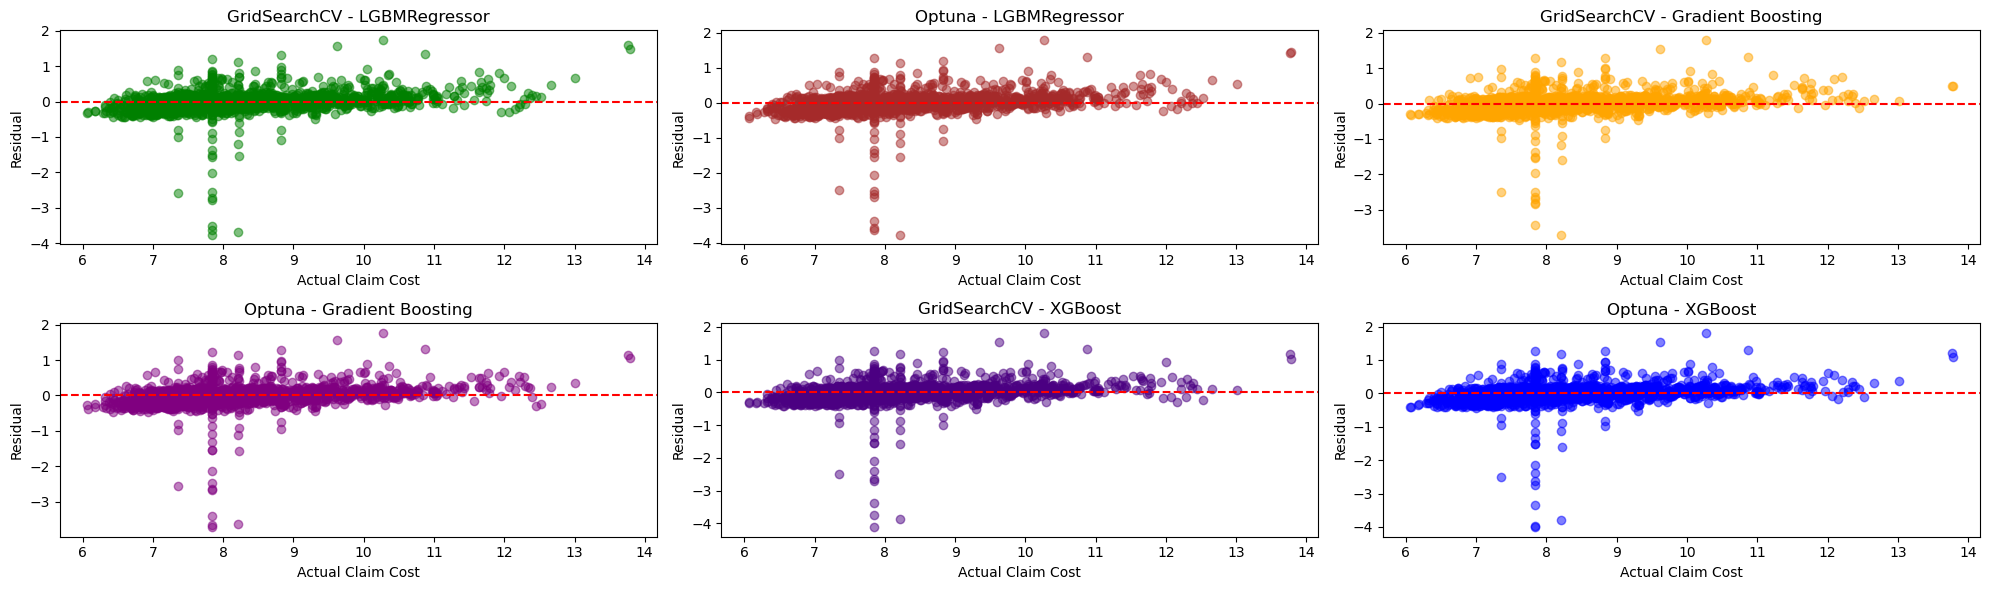

In [47]:
# 5. Residual Plot Analysis

fig, ax = plt.subplots(2, 3, figsize=(20, 6))
ax = ax.flatten() 

# 1. GridSearchCV - LGBM
ax[0].scatter(y_val, y_val - y_pred_lgbm_grid, alpha=0.5, color='green')
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('GridSearchCV - LGBMRegressor')
ax[0].set_xlabel('Actual Claim Cost')
ax[0].set_ylabel('Residual')

# 2. Optuna - LGBM
ax[1].scatter(y_val, y_val - y_pred_lgbm_optuna, alpha=0.5, color='brown')
ax[1].axhline(0, color='red', linestyle='--')
ax[1].set_title('Optuna - LGBMRegressor')
ax[1].set_xlabel('Actual Claim Cost')
ax[1].set_ylabel('Residual')

# 3. GridSearchCV - Gradient Boosting
ax[2].scatter(y_val, y_val - y_pred_gbr_grid, alpha=0.5, color='orange')
ax[2].axhline(0, color='red', linestyle='--')
ax[2].set_title('GridSearchCV - Gradient Boosting')
ax[2].set_xlabel('Actual Claim Cost')
ax[2].set_ylabel('Residual')

# 4. Optuna - Gradient Boosting
ax[3].scatter(y_val, y_val - y_pred_gbr_optuna, alpha=0.5, color='purple')
ax[3].axhline(0, color='red', linestyle='--')
ax[3].set_title('Optuna - Gradient Boosting')
ax[3].set_xlabel('Actual Claim Cost')
ax[3].set_ylabel('Residual')

# 5. GridSearchCV - XGBoost
ax[4].scatter(y_val, y_val - y_pred_xgb_grid, alpha=0.5, color='indigo')
ax[4].axhline(0, color='red', linestyle='--')
ax[4].set_title('GridSearchCV - XGBoost')
ax[4].set_xlabel('Actual Claim Cost')
ax[4].set_ylabel('Residual')

# 6. Optuna - XGBoost
ax[5].scatter(y_val, y_val - y_pred_xgb_optuna, alpha=0.5, color='blue')
ax[5].axhline(0, color='red', linestyle='--')
ax[5].set_title('Optuna - XGBoost')
ax[5].set_xlabel('Actual Claim Cost')
ax[5].set_ylabel('Residual')

plt.tight_layout()
plt.savefig('Visualizations/Advanced Models & Improvements/Residual Plot Analysis_GradientBoosting_XGboosting_LightGBM_TUNED.png', dpi=300, bbox_inches='tight')
plt.show()

# From the residual plots below

# All six models (LGBMRegressor, Gradient Boosting, and XGBoost, 
# each tuned with GridSearchCV and Optuna) exhibit a similar pattern: 
# a funnel shape, where the vertical spread of the residuals increases as the "Actual Claim Cost" (the x-axis) increases
# Gradient Boosting demonstrates the best regressor.



### Insight:
#### Executive Insight: Early Claim Cost Prediction

The analysis confirms that tree-based machine learning models can accurately predict claim severity early in the lifecycle using FNOL and exposure data. Gradient Boosting, LightGBM, Random Forest, and XGBoost all perform strongly (R² > 0.91, MAPE ≈ 2.4–2.6%), while linear regression performs poorly and is not suitable. Gradient Boosting delivers the best balance of accuracy and stability, with LightGBM offering similar performance and better scalability.
Residual analysis shows no systematic bias across claim sizes, indicating reliable predictions for both low- and high-severity claims. All risk scores (driver, vehicle, region) were rebuilt using historical-only data with credibility weighting, ensuring the models are leakage-free.

Recommendations

•	Deploy Gradient Boosting or LightGBM at FNOL to flag high-severity claims early
•	Use predictions to improve reserving accuracy, claims triage, and resource allocation.
This approach enables earlier intervention, better cost control, and more efficient claims operations.
